# Lab 3
## Curve fitting (cont.), isolated vertex vs connectivity phase transition.

### **G(n, M) [Erdős-Rényi](https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model) random graph:**

* __G(n, M)__: a graph is chosen uniformly at random from the collection of all graphs which have _n_ nodes and *M* edges. <br>
    In this lab we will generate G(n, M) random graphs by adding M random edges to an empty graph. 

### What we covered in the last class:

Let $N_T$ be a random variable, which denotes the number of edges required to form a trianlge in G(n, M).

1. We investigated the distribution of $N_T$ via histograms, scatterplots, and probability density plots. We have also seen that the expected value (mean) and the standard deviation of $N_T$ increases linearly with the size of the graph.
2. We learned how to fit curves to data: we fitted both exponential and linear functions to synthetic data, but it was surprising that it looked like both of these funtions fitted the data well. 

### **Goals of this lab:**

1. The goal of this lab is to evaluate the __goodness-of-fit__ of the curves, to be able to decide which curve fits the data better. 
2. Similarly to the triangle containment analysis, we will investigate the number of edges required to make the G(n, M) random graph free of isolated nodes. 
3. Furthermore, we will investigate that after the last isolated node disappeared, how many further edges are required to make the graph connected.

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter
import pandas as pd
from scipy.optimize import curve_fit 

# __Regression analysis__ 

### Parametric (1D) regression 

### Variables:
* $x$: independent/explanatory/input variable (e.g. the number of nodes)
* $y$: dependent/target/output variable (e.g. the mean number of edges required to form a triangle) <br>
[Dependent and independent variables](https://en.wikipedia.org/wiki/Dependent_and_independent_variables)

### Assumption:
There is a relationship between $x$ and $y$ and this relationship is described by function $f$
* ### $y = f(x) + \varepsilon$, 
    * where $\varepsilon$ is the noise; usually assumed to be standard normally distributed and independent of $x$
    * and $f$ is parameterized by $\beta = (\beta_1,\ldots,\beta_k)$. (e.g. $f(x) =a\cdot x + b $ or $f(x) = a\cdot x^b$)

### Goal:
Given a dataset of input-output pairs: $\{(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)\}$, the goal of parametric regression is to find the parameter vector $\beta$ which minimizes the distance between $y=(y_1,\ldots,y_n)$ and its estimation $\hat{y} = f(x) = (f(x_1), \ldots, f(x_n))$.<br> 

![](https://math.bme.hu/~marcessz/notebooks/linearregression.png)

### For the regression, we will use the [scipy's curve_fit function](https://www.geeksforgeeks.org/scipy-curve-fitting/)

Functions that we will use:
* [np.linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)
* [np.exp](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html)
* [np.random.normal](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html)
* [np.power](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.power.html)
* [np.sum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html)
* [np.zeros_like](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html)

#### Now we are going to generate our own dataset, and then use the ```curve_fit``` function to fit exponential and linear curves to our data.

In [2]:
# numpy.linspace with the given arguments 
# produce an array of 41 numbers between 0 
# and 1, both inclusive
x = np.linspace(0, 1, num=41)

In [3]:
x

array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
       0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
       0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
       0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
       0.9  , 0.925, 0.95 , 0.975, 1.   ])

### $y = 3.5 \cdot e^{1.3\cdot x} + noise$ 

In [4]:
y = 3.5 * np.exp(1.3 * x) + np.random.normal(size = 41) 

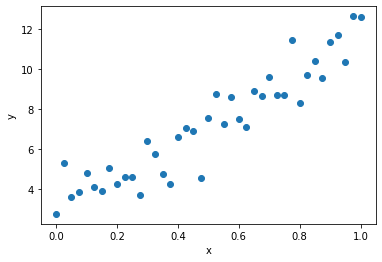

In [5]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [6]:
# Test function with coefficients as parameters.
# Test function = what we would like to fit to the data
def test_exp(x, a, b): 
    return a * np.exp(b * x)

In [7]:
# curve_fit() function takes the test-function 
# x-data and y-data as argument and returns  
# the coefficients a and b in param and 
# the estimated covariance of param in param_cov 
param, param_cov = curve_fit(test_exp, x, y) 

In [8]:
param

array([3.71640161, 1.20826259])

In [9]:
#points of the fitted curve:
fitted_exp_curve = param[0] * np.exp(param[1] * x)

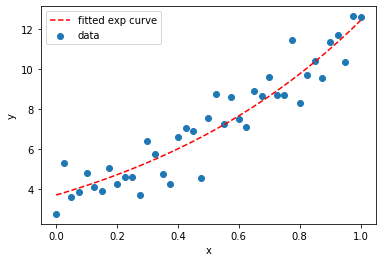

In [10]:
plt.scatter(x, y, label='data')
plt.plot(x, fitted_exp_curve, '--', color='red', label='fitted exp curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## What if do not know the origin of the data, and we believe that our data is linear? 

In [11]:
def test_lin(x, a, b):
    return a*x + b

In [12]:
param_lin, param_lin_cov = curve_fit(test_lin, x, y) 

In [13]:
param_lin

array([8.62015591, 2.92766534])

In [14]:
#points of the fitted line:
fitted_line = param_lin[0] * x+param_lin[1]

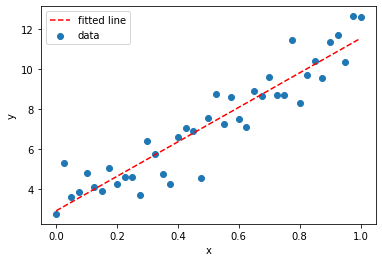

In [15]:
plt.scatter(x, y, label='data')
plt.plot(x, fitted_line, '--', color='red', label='fitted line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### __We can fit a line to any kind of data. With the fitted line, our exponential data looks linear.__ 

# __Exercise 4__ of Lab 2

Repeat the previous analysis, but now let the $y$ be a linear function of $x$ as follows:
#### $y = 9x + 2.5 + noise$

1. Generate the linear data: $y\_lin = 9x + 2.5 + noise$, and visualize it on a scatter plot. 
2. Fit both the exponential and the linear functions to the linear data
3. Plot the data and the fitted curves, similarily as we did before.

#### __This should take you about 5-10 minutes__

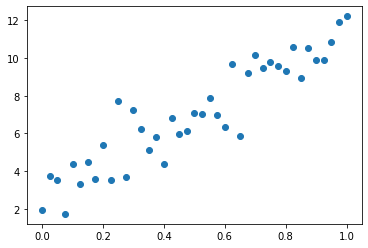

In [34]:
y_lin = 9 * x + 2.5 + np.random.normal(size = 41) 
plt.scatter(x, y_lin)
plt.show()

### Fit exp and lin models again:

In [35]:
# Fit exp
param_2, param_cov_2 = curve_fit(test_exp, x, y_lin) 
# points of the fitted curve
fitted_exp_curve_for_lin = param_2[0]*np.exp(param_2[1]*x)

# Fit lin
param_lin_2, param_lin_cov_2 = curve_fit(test_lin, x, y_lin) 
# points of the fitted line:
fitted_line_for_lin = param_lin_2[0]*x+param_lin_2[1]

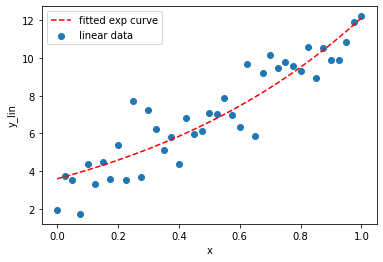

In [36]:
plt.scatter(x, y_lin, label='linear data')
plt.plot(x, fitted_exp_curve_for_lin, '--', color='red', label='fitted exp curve')
plt.xlabel('x')
plt.ylabel('y_lin')
plt.legend()
plt.show()

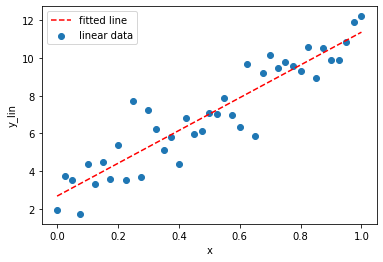

In [37]:
plt.scatter(x, y_lin, label='linear data')
plt.plot(x, fitted_line_for_lin, '--', color='red', label='fitted line')
plt.xlabel('x')
plt.ylabel('y_lin')
plt.legend()
plt.show()

#### <span style="color:red">__Take-home meassage:__</span> __Sometimes we cannot determine visually whether the relationship between the variables is linear or exponential__

## __How to evaluate goodness of fit of the models/functions?__

* #### Sum of Squared Errors ([SSE](https://en.wikipedia.org/wiki/Residual_sum_of_squares)) 
##### also known as Residual Sum of Squares (RSS), and Sum of Squared Residuals (SSR) 
* #### $R^2$ ([R squared](https://en.wikipedia.org/wiki/Coefficient_of_determination))
* #### Adjusted $R^2$ ([for multiple regression](https://en.wikipedia.org/wiki/Coefficient_of_determination#Adjusted_R2))
* #### Residual analysis (described [here](https://stattrek.com/regression/residual-analysis.aspx) and [here](https://opexresources.com/analysis-residuals-explained/))
#### Useful page: [regression metrics](https://dziganto.github.io/data%20science/linear%20regression/machine%20learning/python/Linear-Regression-101-Metrics/)

### $ SSE = \sum_{i=1}^n (y_i - f(x_i))^2$
Residuals: $\varepsilon_i = y_i - f(x_i)$

## First case: $y = 3.5  e^{1.3  x} + noise$

Calculate the SSE of the exponential function:

In [20]:
# f(x_i):
fitted_exp_curve = param[0]*np.exp(param[1]*x)

In [21]:
sse_exp = np.sum(np.power(y - fitted_exp_curve, 2.0))

#### SSE of the fitted exponential function:

In [22]:
sse_exp

34.31770997949978

Calculate the SSE of the linear regression:

In [23]:
# f(x_i):
fitted_line = param_lin[0]*x+param_lin[1]

In [24]:
sse_lin = np.sum(np.power(y - fitted_line, 2.0))

#### SSE of the fitted line:

In [25]:
sse_lin

38.45551342851766

In [26]:
sse_exp/sse_lin

0.8924002547330603

#### __The SSE of the exponential regression is smaller than the SSE of the linear regression $\Longrightarrow$ the exponential model fits better the data__

# __Exercise 5__ of Lab 2

Calculate the SSE of the exponential and the linear models fitted on the linear data, i.e. when $y\_lin = 9x + 2.5 + noise$. Which function fits better the linear data?

#### __This should take you about 10 minutes!__

## Second case: $y = 9x + 2.5 + noise$

SSE of the exponential regression:

In [38]:
np.power(y_lin - fitted_exp_curve_for_lin, 2).sum()

49.88809635812223

SSE of the linear regression:

In [39]:
np.power(y_lin - fitted_line_for_lin, 2).sum()

45.524857016510275

#### __The SSE of the linear regression is smaller than the SSE of the exponential regression $\Longrightarrow$ the linear model fits better the data__

## $R^2$ ([R squared](https://en.wikipedia.org/wiki/Coefficient_of_determination))
#### $R^2$ is the proportion of the variance in variable $y$ that is predictable/explainable from variable $x$. 
[source](https://en.wikipedia.org/wiki/Coefficient_of_determination)

![r-squared](https://upload.wikimedia.org/wikipedia/commons/8/86/Coefficient_of_Determination.svg)<br>
![formula](https://wikimedia.org/api/rest_v1/media/math/render/svg/6b863cb70dd04b45984983cb6ed00801d5eddc94)

The better the linear regression (on the right) fits the data in comparison to the simple average (on the left graph), the closer the value of $R^2$ is to 1. The areas of the blue squares represent the squared residuals with respect to the linear regression. The areas of the red squares represent the squared residuals with respect to the average value.

### __Total Sum of Squares ([TSS or SST]((https://en.wikipedia.org/wiki/Total_sum_of_squares)))__ 

### $TSS= \sum_{i=1}^n (y_i - \bar{y})^2$, where $\bar{y} = \frac{1}{n}\sum_{i=1}^n y_i$

### $$R^2 = 1 - \frac{SSE}{TSS} = 1 - \frac{\sum_{i=1}^n (y_i - f(x_i))^2}{ \sum_{i=1}^n (y_i - \bar{y})^2}$$

# __Exercise 1__ 

1. Write a function that calculates the $R^2$. Its inputs should be the vectors of $\hat{y} = f(x)$ and $y$.
2. Calculate the $R^2$ of the fitted (exponential and linear) functions on the exponential data.
3. Calculate the $R^2$ of the fitted (exponential and linear) functions on the linear data.

Based on the $R^2$ values, which model fits better these data?

In [29]:
def sse(f_x, y):
    return np.power(y - f_x, 2.0).sum()

def tss(y):
    mean_y = y.mean()
    return np.power(y - mean_y, 2.0).sum()

def r_squared(f_x, y):
    return 1 - sse(f_x, y)/tss(y)

### Calculate $R^2$s of the fitted functions on the exponential data:

In [30]:
r_squared(fitted_exp_curve, y)

0.8874947924728616

In [31]:
r_squared(fitted_line, y)

0.8739296555212306

### Fortunately, on the exponential data, the $R^2$ of the <span style="color:red">exponential</span> regression is higher than the $R^2$ of the <span style="color:red">linear</span> regression.

### $R^2$s for linear data:

In [40]:
r_squared(fitted_exp_curve_for_lin, y_lin)

0.842170786828448

In [41]:
r_squared(fitted_line_for_lin, y_lin)

0.8559746134411598

### Similarly, when the data is linear, then the $R^2$ of the <span style="color:red">linear</span> regression is higher than the $R^2$ of the <span style="color:red">exponential</span> regression.

# __Residual analysis__

We check whether our assumptions on the noise term holds

### Recall our assumption:

There is a relationship between $x$ and $y$ and this relationship is described by function $f$
* ### $y = f(x) + \varepsilon$, 
    * where $\varepsilon$  is the __noise__; usually assumed to be __standard normally distributed__ and independent of $x$
    * and $f$ is parametrized by $\beta = (\beta_1,\ldots,\beta_k)$. (e.g. $f(x) = \beta_0 + \beta_1 x $ )

### The sum of squares of residuals is the sum of squares of estimates of the random noise $\varepsilon_i$; that is
#### $$SSE = \sum_{i=1}^n (\varepsilon_i)^2 = \sum_{i=1}^n (y_i - \hat{y}_i)^2 = \sum_{i=1}^n (y_i - f(x_i))^2 $$

### Residual = Observed value - Predicted (estimated) value = y - f(x). 
### Based on our assumption, if our model fits the data well, then the residuals should be standard normally distributed and independent of $x$.

![https://opexresources.com/wp-content/uploads/2017/03/good-bad-correlations-e1488988577870.jpg](https://opexresources.com/wp-content/uploads/2017/03/good-bad-correlations-e1488988577870.jpg)

# __Recreation of this figure:__ 

## __1. When your model is appropriate for the data:__

(don't worry, most of the following code is just the settings of the labels, titles, and colors)

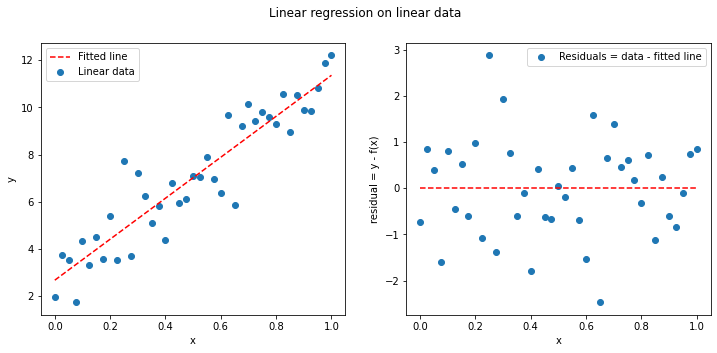

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('Linear regression on linear data')
ax1.scatter(x, y_lin, label='Linear data')
ax1.plot(x, fitted_line_for_lin, '--', color='red', label='Fitted line')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
# if you add labels, then you have to write plt.legend() or ax1.legend() 
# to show the labels on the figure 
ax1.legend() 

ax2.scatter(x, y_lin - fitted_line_for_lin, label='Residuals = data - fitted line')
ax2.plot(x, np.zeros_like(x), '--', color='red')
ax2.set_xlabel('x')
ax2.set_ylabel('residual = y - f(x)')
ax2.legend()
plt.show()

### __The residuals are random, independent of $x$, and have zero mean.__ 

## __2. When your model is <span style='color:red'>not</span> appropriate for the data:__

### Let's generate quadratic data, and then fit a line: 

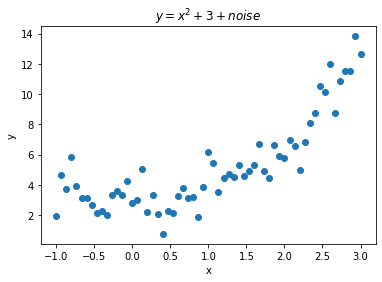

In [43]:
x_quad = np.linspace(-1,3,61)
y_quad = np.power(x_quad, 2) +3 + np.random.normal(size = 61) 
plt.scatter(x_quad, y_quad)
plt.xlabel('x')
plt.ylabel('y')
plt.title('$y = x^2 + 3 + noise$')
plt.show()

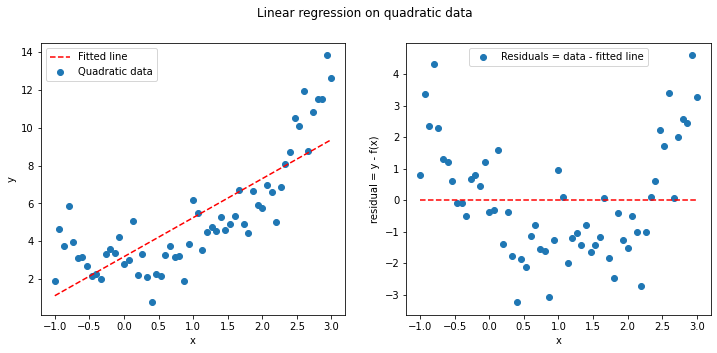

In [44]:
# Fit lin
parameters, cov_parameters = curve_fit(test_lin, x_quad, y_quad) 
# points of the linear regression:
lin_reg_for_quad = parameters[0]*x_quad + parameters[1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('Linear regression on quadratic data')

ax1.scatter(x_quad, y_quad, label='Quadratic data')
ax1.plot(x_quad, lin_reg_for_quad, '--', color='red', label='Fitted line')

# Set the labels of the axes
ax1.set_xlabel('x')
ax1.set_ylabel('y')
# if you add labels, then you have to write plt.legend() or ax1.legend() 
# to show the labels on the figure 
ax1.legend() 

# Calculate the residuals
residuals = y_quad - lin_reg_for_quad


# Second figure:
ax2.scatter(x_quad, residuals, label='Residuals = data - fitted line')
ax2.plot(x_quad, np.zeros_like(x_quad), '--', color='red')

ax2.set_xlabel('x')
ax2.set_ylabel('residual = y - f(x)')
ax2.legend()
plt.show()

## __The patterns of the residuals is non-random (U-shape) $\Longrightarrow$  suggesting a better fit for a non-linear model.__

---

---

---

__Note:__ In regression analysis $n$ denoted the sample size, in graph theory/network science $n$ denotes the size of the graph, i.e. the number of nodes. 

# Isolated vertex vs connectivity phase transition in _G(n, M)_

### **Goal of the following exrices:**

1. The goal is to investigate when the last isolated vertex disappears in G(n, M). We start with an empty graph G, and we keep adding random edges to G until it has no isolated vertices. We repeat this procedure several times and note when the last isolated vertex disappeared. Then we investigate the distribution of the number of edges required to make the graph free of isolated nodes. 
2. We investigate that after the last isolated node disappeared, how many further edges are required to make the graph connected.


__Claim:__
* If in the G(n, p) model $p<\frac{(1-\varepsilon )\ln n}{n}$, then the graph will almost surely contain isolated vertices, and thus be disconnected.
* If in the G(n, p) model $p>\frac{(1+\varepsilon )\ln n}{n}$, then the graph  will almost surely  be connected. <br>


It means that in the G(n, M) graph the isolated vertices disappear around $\binom{n}{2}\frac{\ln(n)}{n} = \frac{n(n-1)}{2}\frac{\ln(n)}{n} = \frac{(n-1)\ln(n)}{2}$ edges. What is more, probably the graph will be connected as well. 

# __Exercise 2__

Implement a function called ```no_isolates```, which is very similar to the ```first_triangle``` function, but it focuses on the isolated nodes instead of the first triangle. 

It should have one input: the size of the graph. The function should start with an empty graph, and then it should add edges until there are no isolated nodes in the graph. When the last isolated node disappeared, the function should return the number of edges of the graph. 

Useful built-in functions:
* [nx.empty_graph(n)](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.classic.empty_graph.html)
* [nx.complete_graph(n)](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.classic.complete_graph.html#networkx.generators.classic.complete_graph)
* [Graph.number_of_edges()](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.number_of_edges.html)
* [nx.isolates(G)](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.isolate.isolates.html) (you have to use ```list(nx.isolates(G))``` to get the list of isolated nodes of G)

In [80]:
def no_isolates(graph_size=50, theoretical_value=False):
    
    # If theoretical_value == True, then print out (n-1)ln(n)/2
    if theoretical_value:
        print(f"(n-1)log(n)/2 = {np.log(graph_size)*(graph_size-1)/2}")

    # Create an empty graph
    graph = nx.empty_graph(graph_size)
    
    # possible_edges = edges of complete graph
    possible_edges = set(nx.complete_graph(graph_size).edges)
 
    # While the graph contains isolates:
    while list(nx.isolates(graph)):

        # Add a random edge to the graph
        random_edge = random.choice(list(possible_edges))
        possible_edges -= {random_edge}
        graph.add_edge(*random_edge)
        
    return graph.number_of_edges()

In [93]:
no_isolates()

81

In [89]:
no_isolates(theoretical_value=True)

(n-1)log(n)/2 = 95.84456363298958


106

# __Exercise 3__ 

Similarly to __Exercise 1__ of Lab 2, investigate the distribution of the number of edges required to make the graph free of isolated nodes, i.e. the distribution of the output of the previous function:
1. Create a list of a few thousand independent trials, e.g. 3-5 thousand (and save it in a variable)
2. Plot the histogram of the trials. Useful function: [plt.hist(x, bins=40)](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html)
3. Plot the frequencies against the required number of edges on a [scatter plot](https://en.wikipedia.org/wiki/Scatter_plot). 
    * On the same figure, plot a red vertical dashed line at $x=(n-1)\ln(n)/2$ with the help of the [plt.axvline](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.axvline.html)

#### __This should take you about 18 minutes!__ 

In [71]:
edges_no_isolates = [no_isolates() for _ in range(5000)]

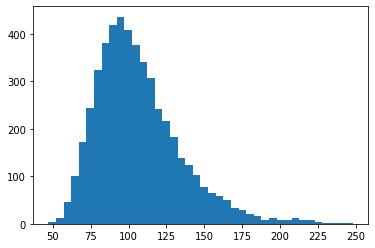

In [72]:
plt.hist(edges_no_isolates, bins=40)
plt.show()

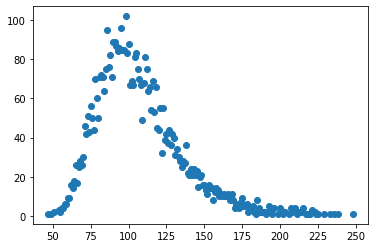

In [73]:
edges_no_isolates_cnt = dict(Counter(edges_no_isolates))
plt.scatter(edges_no_isolates_cnt.keys(), edges_no_isolates_cnt.values())
plt.show()

Another solution using numpy's unique function

In [75]:
np.unique(edges_no_isolates)

array([ 47,  49,  51,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
       181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,
       194, 195, 196, 199, 200, 201, 202, 203, 206, 207, 208, 209, 210,
       211, 212, 213, 214, 215, 217, 218, 220, 221, 222, 223, 224, 225,
       229, 233, 236, 238, 248])

In [76]:
np.unique(edges_no_isolates, return_counts=True)

(array([ 47,  49,  51,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
         64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
         77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
         90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
        103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
        116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
        129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
        142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
        155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
        181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,
        194, 195, 196, 199, 200, 201, 202, 203, 206, 207, 208, 209, 210,
        211, 212, 213, 214, 215, 217, 218, 220, 221, 222, 223, 224, 225,
        229, 233, 236, 238, 248]),
 array([  1,   1

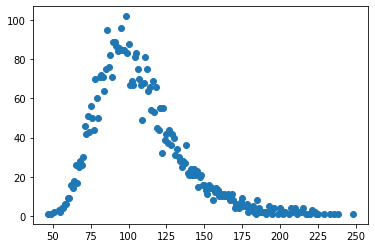

In [78]:
unique_values, counts = np.unique(edges_no_isolates, return_counts=True)
plt.scatter(unique_values, counts)
plt.show()

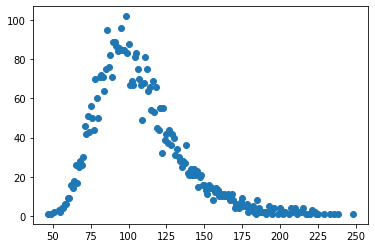

In [79]:
plt.scatter(*np.unique(edges_no_isolates, return_counts=True))
plt.show()

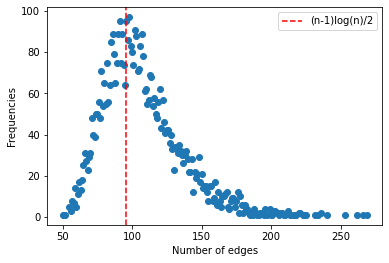

In [31]:
plt.scatter(edges_no_isolates_cnt.keys(), edges_no_isolates_cnt.values())
plt.axvline(x=np.log(50)*(50-1)/2, linestyle='--', c='red', label='(n-1)log(n)/2')
plt.xlabel('Number of edges')
plt.ylabel('Frequencies')
plt.legend()
plt.show()

### <span style="color:red">__Take-home meassage:__</span> __The "theoretical value" $(n-1)\ln(n)/2$ is at the peak__

# __Exercise 4__

Create four samples (with sample size = 500) with the ```no_isolates``` function for graph_size = 30, 50, 70, 100.
1. On the same figure, plot the [estimated probability density](https://en.wikipedia.org/wiki/Kernel_density_estimation) functions of the samples. 
2. Similarly to the previous exercise: Plot the frequencies against the required number of edges for the four samples on the same scatter plot. 

#### __This should take you about 10 minutes!__ 

In [165]:
sample_30 = [no_isolates(30) for _ in range(500)]
sample_50 = [no_isolates(50) for _ in range(500)]
sample_70 = [no_isolates(70) for _ in range(500)]
sample_100 = [no_isolates(100) for _ in range(500)]

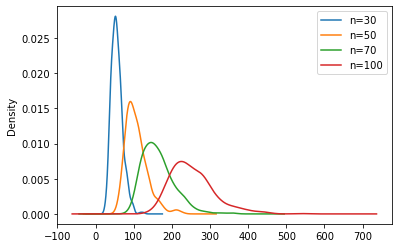

In [167]:
pd.Series(sample_30).plot.kde(label='n=30')
pd.Series(sample_50).plot.kde(label='n=50')
pd.Series(sample_70).plot.kde(label='n=70')
pd.Series(sample_100).plot.kde(label='n=100')
plt.legend()
plt.show()

In [166]:
sample_30_cnt = Counter(sample_30)
sample_50_cnt = Counter(sample_50)
sample_70_cnt = Counter(sample_70)
sample_100_cnt = Counter(sample_100)

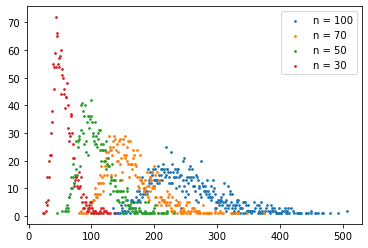

In [163]:
plt.scatter(sample_100_cnt.keys(), sample_100_cnt.values(), s=3, label='n = 100')
plt.scatter(sample_70_cnt.keys(), sample_70_cnt.values(), s=3, label='n = 70')
plt.scatter(sample_50_cnt.keys(), sample_50_cnt.values(), s=3, label='n = 50')
plt.scatter(sample_30_cnt.keys(), sample_30_cnt.values(), s=3, label='n = 30')
plt.legend()
plt.show()